## Customer Segmentation with KMeans

The data is retreived rom Kaggle. Data is about the informations of some customers obtained through membership cards. Here I will make a segmentation study for the mall customers.

In [ ]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Mall_Customers.csv").copy()

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.index

RangeIndex(start=0, stop=200, step=1)

In [7]:
df.index = df.iloc[:,0]

In [8]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
           dtype='int64', name='CustomerID', length=200)

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,,
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40


In [10]:
df = df.iloc[:,1:5]

In [11]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [12]:
df.index.name = None

In [13]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


I turned Customer IDs into indexes

In [14]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


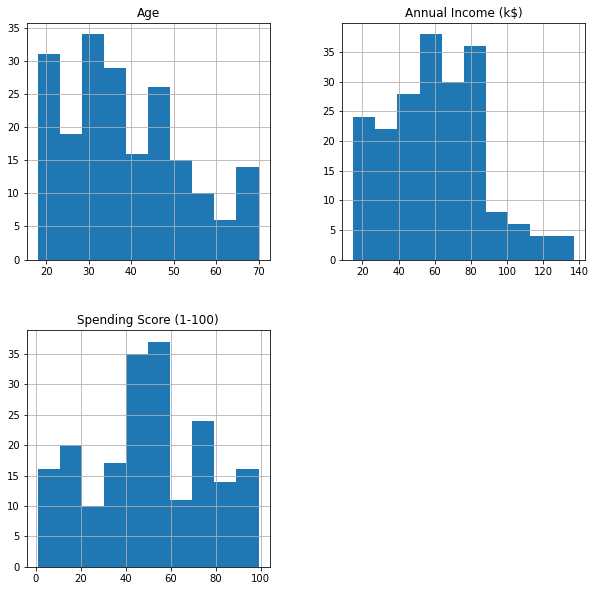

In [18]:
df.hist(figsize = (10,10));

In [19]:
import seaborn as sns

<AxesSubplot:ylabel='Spending Score (1-100)'>

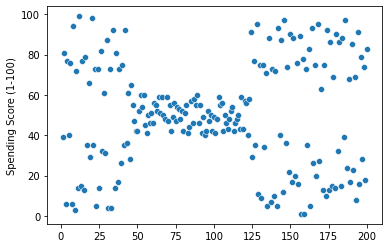

In [26]:
sns.scatterplot(x = df.index, y = df['Spending Score (1-100)'])

Bases on Spending Score only, it seems there are five different groups

## Preprocessing - Genre Data 

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
lbe = LabelEncoder()

lbe.fit_transform(df["Genre"])

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [31]:
df["Sex"] = lbe.fit_transform(df["Genre"])

In [32]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Sex
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0


In [33]:
df = df.iloc[:,1:5]

In [34]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Sex
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


## Building Kmeans Model

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans

KMeans(n_clusters=5)

In [36]:
k_fit = kmeans.fit(df)

In [37]:
k_fit.n_clusters

5

In [38]:
k_fit.cluster_centers_

array([[43.08860759, 55.29113924, 49.56962025,  0.41772152],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [25.52173913, 26.30434783, 78.56521739,  0.39130435],
       [45.2173913 , 26.30434783, 20.91304348,  0.39130435],
       [40.66666667, 87.75      , 17.58333333,  0.52777778]])

In [39]:
k_fit.labels_

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

## Visualization of the Clustring

In [40]:
groups = k_fit.labels_

In [44]:
import matplotlib.pyplot as plt

## Visualization based on Annual Income and Spending Score

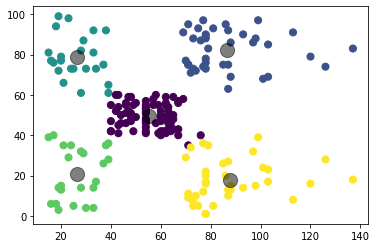

In [48]:
plt.scatter(df.iloc[:,1], df.iloc[:,2], c = groups, s = 50, cmap = "viridis")

centers = k_fit.cluster_centers_

plt.scatter(centers[:,1], centers[:,2], c = "black", s = 200, alpha = 0.5);

## Visualization based on Age and Spending Score

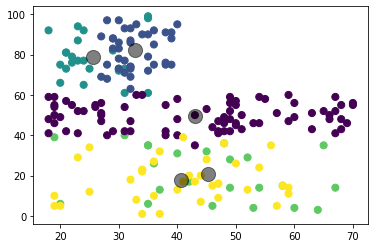

In [50]:
plt.scatter(df.iloc[:,0], df.iloc[:,2], c = groups, s = 50, cmap = "viridis")

centers = k_fit.cluster_centers_

plt.scatter(centers[:,0], centers[:,2], c = "black", s = 200, alpha = 0.5);

## Finding the Optimum Number of Clusters

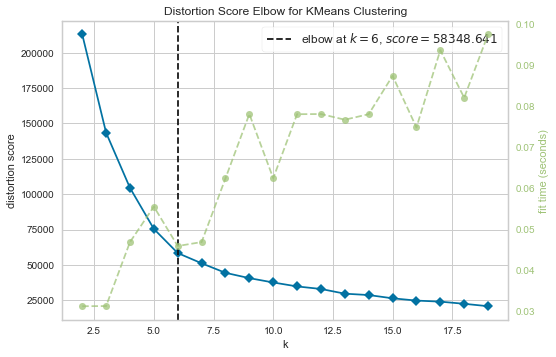

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
!pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(df) 
visualizer.poof() 

## Elbow method shows us that we can continue with 5 clustrings

In [53]:
kmeans = KMeans(n_clusters = 5)
k_fit = kmeans.fit(df)
group = k_fit.labels_

In [54]:
group

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [58]:
groups_ = pd.DataFrame(data = group, index = df.index)

In [59]:
groups_.head()

,0
1,3
2,0
3,3
4,0
5,3


In [62]:
groups_.rename(columns = {0:'Group'}, inplace = True)

In [64]:
groups_.head()

,Group
1,3
2,0
3,3
4,0
5,3


In [65]:
df['Group'] = groups_['Group']

## Adding Groups Knowledge to the Data

In [66]:
df

,Age,Annual Income (k$),Spending Score (1-100),Sex,Group
1,19,15,39,1,3
2,21,15,81,1,0
3,20,16,6,0,3
4,23,16,77,0,0
5,31,17,40,0,3
...,...,...,...,...,...
196,35,120,79,0,2
197,45,126,28,0,4
198,32,126,74,1,2
199,32,137,18,1,4


Data Source

Kaggle. Mall customers. Retreived from : https://www.kaggle.com/datasets/kandij/mall-customers. Acces Date: 05.05.2022.